In [1]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b           # np.sum(w*x)计算相乘后的各个元素的总和
    if tmp <= 0:
        return 0
    else:
        return 1

In [2]:
print(AND(0, 0)) # 输出0
print(AND(1, 0)) # 输出0
print(AND(0, 1)) # 输出0
print(AND(1, 1)) # 输出1

0
0
0
1


In [3]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])   # 仅偏置与AND不同
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [4]:
def NOT(x):
    return 1 if x <= 0 else 0

In [5]:
# 我们使用之前定义的AND函数、OR函数，可以轻松实现异或门
def XOR(x1, x2):
    s1 = not AND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [6]:
print(XOR(0, 0)) # 输出0
print(XOR(1, 0)) # 输出1
print(XOR(0, 1)) # 输出1
print(XOR(1, 1)) # 输出0

0
1
1
0


常见的神经网络是如下图所示的层级结构，每层神经元与下一层神经元全互连，神经元之间不存在同层连接，也不存在跨层连接。这样的网络也通常称为 多层前馈神经网络(multi-layer feedforward neural network)。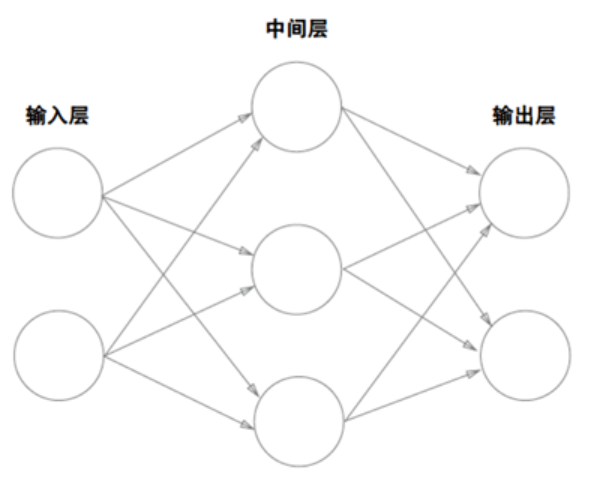

### 激活函数

In [7]:
# 阶跃函数
import numpy as np

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [8]:
# 支持 NumPy 数组的实现。
def step_function(x):
    y = x > 0
    return y.astype(int)

In [9]:
step_function(np.array([-1.0, 1.0, 2.0]))

array([0, 1, 1])

In [10]:
import numpy as np
import matplotlib.pylab as plt

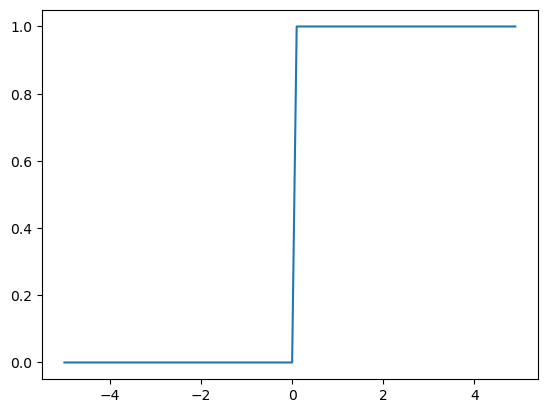

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

In [12]:
# Sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

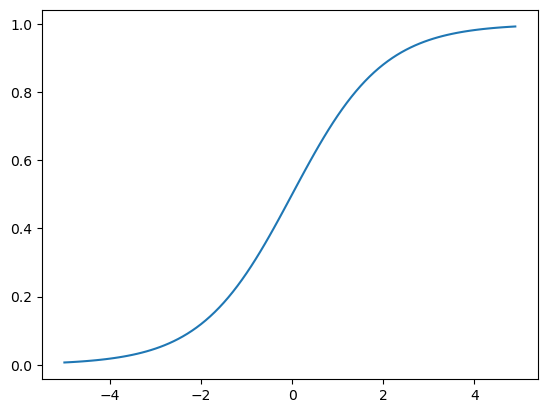

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [15]:
# Tanh 函数
def tanh(x):
    return np.tanh(x)

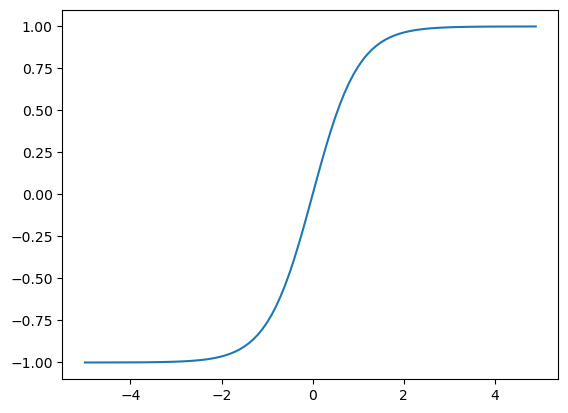

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.show()

In [17]:
# ReLU 函数
def relu(x):
    return np.maximum(0, x)

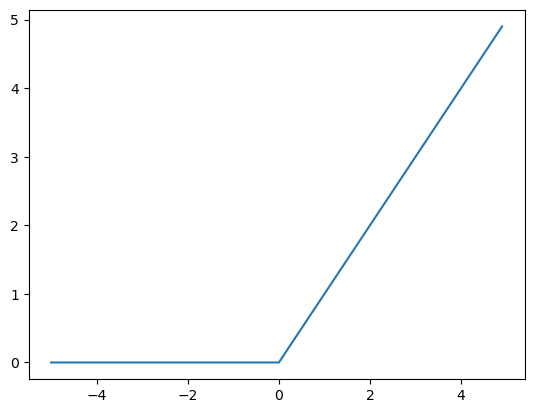

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [19]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], 
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(X.shape)  # (2,)
print(W1.shape) # (2, 3)
print(B1.shape) # (3,)

(2,)
(2, 3)
(3,)


In [20]:
A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [21]:
W2 = np.array([[0.1, 0.4], 
               [0.2, 0.5], 
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


In [22]:
# 恒等函数(不知道这里的意义是什么, 学校老师的文档挺落后的)
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], 
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [23]:
# 只把权重记为大写字母 W1，W2，W3，其他的（偏置或中间结果等）都用小写字母表示。
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

networks = init_network()
x = np.array([1.0, 0.5])
y = forward(networks, x)
print(y)

[0.31682708 0.69627909]


In [24]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)               # 指数函数
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [25]:
sum_exp_a = np.sum(exp_a)       # 指数函数的和
print(sum_exp_a)

74.1221542101633


In [26]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [27]:
np.sum(y)

np.float64(1.0)

In [28]:
# softmax函数
def softmax(a):
    exp_a = np.exp(a)
    return exp_a / np.sum(exp_a)

In [29]:
np.exp(1000)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28280\2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


np.float64(inf)

In [30]:
a = np.array([1010, 1000, 990])
softmax(a)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28280\2542084869.py:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28280\2542084869.py:4: RuntimeWarning: invalid value encountered in divide
  return exp_a / np.sum(exp_a)


array([nan, nan, nan])

In [31]:
a = np.array([1010, 1000, 990])
print(np.max(a))
a = a - np.max(a)
print(a)

1010
[  0 -10 -20]


In [32]:
np.exp(a) / np.sum(np.exp(a))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [33]:
# 防止上溢
def softmax(a):
    exp_a = np.exp(a - np.max(a)) # 溢出对策
    return exp_a / np.sum(exp_a)

In [34]:
a = np.array([1010, 1000, 990])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [36]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

transform = transforms.ToTensor()
train_set = MNIST(root='./data', train=True, download=True, transform=transform)
test_set = MNIST(root='./data', train=False, download=True, transform=transform)

100.0%
100.0%
100.0%
100.0%


In [37]:
train_images = train_set.data        # 训练集图像 (torch.Tensor, 形状 [60000, 28, 28])
test_images = test_set.data          # 测试集图像 (形状 [10000, 28, 28])
train_labels = train_set.targets  # 训练集标签 (torch.Tensor 类型)
test_labels = test_set.targets    # 测试集标签
print(train_labels.shape)  # 输出: torch.Size([60000])
print(train_labels[:10])   # 示例输出: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])
print(train_images.shape)  # 输出: torch.Size([60000, 28, 28])
print(train_images.dtype)  # 输出: torch.uint8 (像素值范围 0-255)

torch.Size([60000])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])
torch.Size([60000, 28, 28])
torch.uint8


In [38]:
image = train_images[0]
label = train_labels[0]
print(label) # 5

tensor(5)


torch.Size([28, 28])


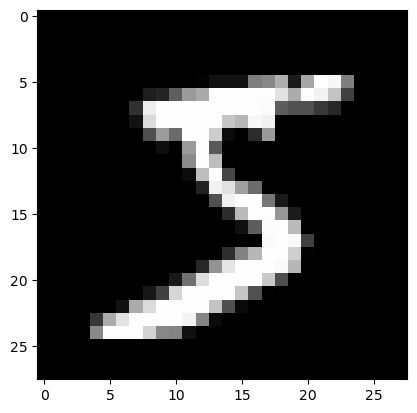

In [39]:
import numpy as np
import matplotlib.pyplot as plt

print(image.shape)
plt.imshow(image, cmap=plt.cm.gray) # cmap=plt.cm.gray 指定使用灰度颜色映射(colormap)
plt.show()

In [40]:
def get_data():
    train_images = train_set.data        # 训练集图像 (torch.Tensor, 形状 [60000, 28, 28])
    test_images = test_set.data          # 测试集图像 (形状 [10000, 28, 28])
    train_labels = train_set.targets  # 训练集标签 (torch.Tensor 类型)
    test_labels = test_set.targets    # 测试集标签
    return test_images, test_labels

In [47]:
def init_network():
    with open("mnist_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [48]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [60]:
import pickle

network = init_network()

test_images, test_labels = get_data()
test_images = test_images.numpy()
test_images = test_images.astype(np.float32) / 255.0      # Normalization

accuracy_cnt = 0

# 对数据一个一个的进行处理
for i in range(len(test_images)):
    y = predict(network, test_images[i].flatten()) # .flatten()将多维图像数据展平为一维数组
    p = np.argmax(y)                  # argmax获取数组中最大值的索引
    if p == test_labels[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(test_images)))

Accuracy: 0.9352


In [61]:
network = init_network()

test_images, test_labels = get_data()
test_images = test_images.numpy()
test_labels = test_labels.numpy()
test_images = test_images.astype(np.float32) / 255.0      # Normalization

batch_size = 100
accuracy_cnt = 0

# 分批次处理:100个一批次
for i in range(0, len(test_images), batch_size):
    test_images_batch = test_images[i:i+batch_size].reshape(batch_size, 784)
    y_batch = predict(network, test_images_batch)
    p = np.argmax(y_batch, axis=1)          # 沿指定轴找到最大值元素的索引
    accuracy_cnt += np.sum(p == test_labels[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(test_images)))

Accuracy: 0.9352
